<a href="https://colab.research.google.com/github/bekzat17/ML_fall_2019/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total samples in our dataset is: 506
Initial cost is:  296.0734584980237 

Optimal parameters are: 
 [[14.28507047]
 [-0.59432378]
 [ 0.45391803]
 [-0.56129831]
 [ 0.7858901 ]
 [-0.43633501]
 [ 2.5763949 ]
 [-0.25049398]
 [-0.67330639]
 [-0.02827091]
 [-0.49865537]
 [-1.43964845]
 [ 0.66126887]
 [-2.27355929]] 

Final cost is:  [47.49122088]


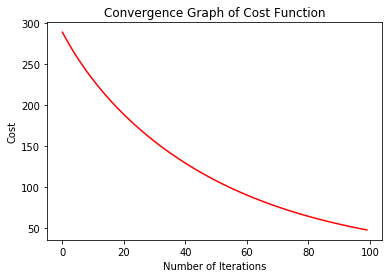

In [8]:
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

dataset = load_boston()

X = dataset.data
y = dataset.target[:, np.newaxis]

print("Total samples in our dataset is: {}".format(X.shape[0]))


def compute_cost(X, y, params):
    n_samples = len(y)
    h = X @ params
    return (1/(2*n_samples))*np.sum((h-y)**2)


def gradient_descent(X, y, params, learning_rate, n_iters):
    n_samples = len(y)
    J_history = np.zeros((n_iters,1))
    for i in range(n_iters):
        params = params - (learning_rate/n_samples) * X.T @ (X @ params - y)
        J_history[i] = compute_cost(X, y, params)
    return (J_history, params)


n_samples = len(y)

mu = np.mean(X, 0)
sigma = np.std(X, 0)

X = (X-mu) / sigma

X = np.hstack((np.ones((n_samples,1)),X))
n_features = np.size(X, 1)
params = np.zeros((n_features,1))


n_iters = 100
learning_rate = 0.01

initial_cost = compute_cost(X, y, params)

print("Initial cost is: ", initial_cost, "\n")

(J_history, optimal_params) = gradient_descent(X, y, params, learning_rate, n_iters)

print("Optimal parameters are: \n", optimal_params, "\n")
print("Final cost is: ", J_history[-1])

plt.plot(range(len(J_history)), J_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()